### SySc 575, ECE 4/555, AI: NN1, Fall 2017, Lecture #6

This is a paragraph

Here is another paragraph


In [223]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

**Create a simple dataset.**

These rows define the 'OR' relation for tuples (X1, X2, Y).

In [224]:
# Inputs
in_data = np.array([[0,0],[0,1],[1,0],[1,1]])

In [225]:
# Targets
out_data = np.array([[0],[1],[1],[1]])

**Define a single-layer, single-node model.**

In [243]:
model = Sequential()
layer1 = Dense(1, input_dim=2, activation='sigmoid')
model.add(layer1)


In [244]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [245]:
print(model.predict_proba(in_data))

4/4 [==============================] - 0s
[[ 0.5       ]
 [ 0.73968661]
 [ 0.46830866]
 [ 0.714513  ]]


In [246]:
error_history = []
weight_history = []

def capture_data(epoch,logs):
    weights = model.get_weights()
    weight_history.append(weights)
    error_history.append(logs['loss'])
    
capture_data_callback = keras.callbacks.LambdaCallback(on_epoch_end=capture_data)

In [247]:
sgd = SGD(lr=0.4)
model.compile(loss='mse', optimizer=sgd)
hist = model.fit(in_data, out_data, batch_size=1, epochs=2000, verbose=0,callbacks=[capture_data_callback])


**After training, check how well the model is able to predicts the outputs.**

Given the four rows of input pairs (X1, X2), what is predicted for Y?

In [248]:
print(model.predict_proba(in_data))

4/4 [==============================] - 0s
[[ 0.04246057]
 [ 0.97339904]
 [ 0.97339636]
 [ 0.99996686]]


In [249]:
def flatten_concatenate(w):
    a = tuple(map(lambda x:x.flatten(),w))
    return np.concatenate(a)

w_data = []

for weights in weight_history:
    a = flatten_concatenate(weights)
    w_data.append(a)

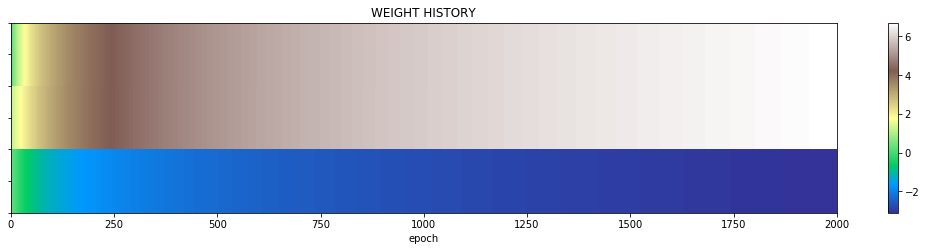

In [250]:
im = plt.imshow(np.array(w_data).T, interpolation='none', cmap='terrain', aspect='auto')
fig = plt.gcf()
fig.set_size_inches(18.5,3.5)
ax = plt.axes()
ax.set_yticklabels([])
plt.xlabel('epoch')
plt.title('WEIGHT HISTORY')
plt.colorbar()
plt.show()

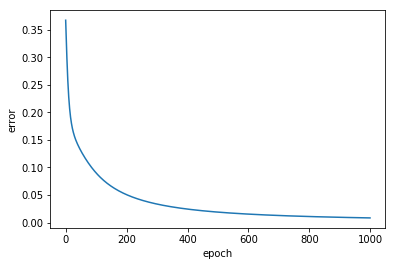

In [220]:
plt.plot(error_history)
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

In [189]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
sgd = SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
hist = model.fit(in_data, out_data, batch_size=1, initial_epoch=0, epochs=100, verbose=0)

In [ ]:
model = Sequential()
model.add(Dense(2, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))